#Dinâmica New York Flights

CONTEXTUALIZAÇÃO

Vocês atuam na NY Flights, uma companhia aérea de nível global, e foram questionados pela gestão sobre o desempenho das linhas aéreas. A empresa está extremamente preocupada com atraso em seus voos, alguns dados estatísticos sobre o tema foram urgentemente solicitados para vocês (o time de ciência a de dados da companhia). 

O diretor do time solicitou que os resultados numéricos e gráficos para a reunião, pois planos de ações serão definidos a partir destes dados!

#CARREGAMENTO DAS BIBLIOTECAS

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
upload = files.upload()

Saving nyflights.csv to nyflights (1).csv


In [5]:
df = pd.read_csv('nyflights.csv')
df.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,336776.0,168388.500000,97219.001466,1.0,84194.75,168388.5,252582.25,336776.0
year,336776.0,2013.000000,0.000000,2013.0,2013.00,2013.0,2013.00,2013.0
month,336776.0,6.548510,3.414457,1.0,4.00,7.0,10.00,12.0
day,336776.0,15.710787,8.768607,1.0,8.00,16.0,23.00,31.0
dep_time,328521.0,1349.109947,488.281791,1.0,907.00,1401.0,1744.00,2400.0
sched_dep_time,336776.0,1344.254840,467.335756,106.0,906.00,1359.0,1729.00,2359.0
dep_delay,328521.0,12.639070,40.210061,-43.0,-5.00,-2.0,11.00,1301.0
arr_time,328063.0,1502.054999,533.264132,1.0,1104.00,1535.0,1940.00,2400.0
sched_arr_time,336776.0,1536.380220,497.457142,1.0,1124.00,1556.0,1945.00,2359.0
arr_delay,327346.0,6.895377,44.633292,-86.0,-17.00,-5.0,14.00,1272.0


In [8]:
df = df.drop(columns=['Unnamed: 0'])

1. Qual o comportamento médio e a variância dos dados dos voos que atrasam mais de duas horas?

In [9]:
df_atraso= df[df['dep_delay']> 120]

In [10]:
df_atraso.tail()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
336579,2013,9,30,1823.0,1545,158.0,1934.0,1733,121.0,9E,3459,N916XJ,JFK,BNA,95.0,765,15,45,2013-09-30 15:00:00
336668,2013,9,30,1951.0,1649,182.0,2157.0,1903,174.0,EV,4294,N13988,EWR,SAV,95.0,708,16,49,2013-09-30 16:00:00
336724,2013,9,30,2053.0,1815,158.0,2310.0,2054,136.0,EV,5292,N600QX,EWR,ATL,91.0,746,18,15,2013-09-30 18:00:00
336757,2013,9,30,2159.0,1845,194.0,2344.0,2030,194.0,9E,3320,N906XJ,JFK,BUF,50.0,301,18,45,2013-09-30 18:00:00
336763,2013,9,30,2235.0,2001,154.0,59.0,2249,130.0,B6,1083,N804JB,JFK,MCO,123.0,944,20,1,2013-09-30 20:00:00


In [11]:
df_atraso['dep_delay'].describe()

count    9723.000000
mean      186.983236
std        74.596836
min       121.000000
25%       139.000000
50%       166.000000
75%       210.000000
max      1301.000000
Name: dep_delay, dtype: float64

In [12]:
df_atraso_descr = pd.DataFrame(df_atraso['dep_delay'].describe())

In [13]:
df_atraso_descr = df_atraso_descr.T

In [14]:
df_atraso_descr

,count,mean,std,min,25%,50%,75%,max
dep_delay,9723.0,186.983236,74.596836,121.0,139.0,166.0,210.0,1301.0


Calculando a amplitude e variancia

In [15]:
df_atraso_descr['amplitude'] = df_atraso_descr['max'] - df_atraso_descr['min'] 
df_atraso_descr['variancia'] = pow(df_atraso_descr['std'], 2)

In [16]:
df_atraso_descr

,count,mean,std,min,25%,50%,75%,max,amplitude,variancia
dep_delay,9723.0,186.983236,74.596836,121.0,139.0,166.0,210.0,1301.0,1180.0,5564.687952


Plotando os gráficos de box plot e histograma

Text(0.5, 0, 'time(m)')

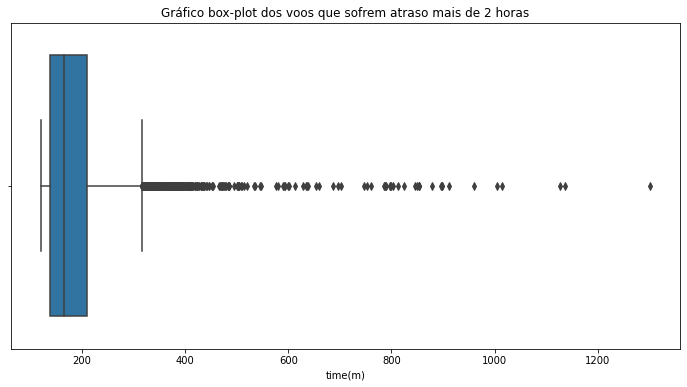

In [17]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(data = df_atraso, x= 'dep_delay')
plt.title('Gráfico box-plot dos voos que sofrem atraso mais de 2 horas')
plt.xlabel('time(m)')

Text(0.5, 0, '')

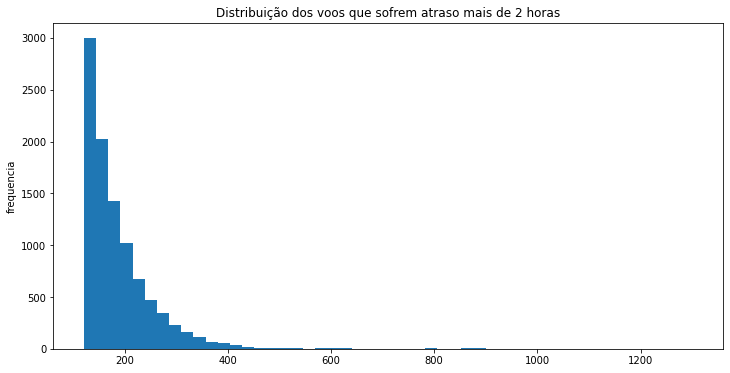

In [18]:
fig = plt.figure(figsize=(12,6))
plt.hist(data = df_atraso, x= 'dep_delay', bins=50)
plt.title('Distribuição dos voos que sofrem atraso mais de 2 horas')
plt.ylabel('frequencia')
plt.xlabel('')

2. Quais destinos geraram voos com o maior número de atrasos na partida? (5 piores | Considerar 5 minutos um atraso aceitável)

In [19]:
df_partida = df[df['arr_delay'] > 5 ]

In [20]:
df_destinos = df_partida['dest'].value_counts()

In [21]:
df_destinos = pd.DataFrame(df_destinos)

In [22]:
df_destinos['destino'] = df_destinos.index

In [23]:
df_destinos

,dest,destino
ATL,6417,ATL
ORD,5219,ORD
LAX,4804,LAX
CLT,4711,CLT
MCO,4520,MCO
...,...,...
HDN,5,HDN
MTJ,4,MTJ
SBN,3,SBN
ANC,3,ANC


In [24]:
df_destinos.reset_index(drop = True, inplace = True)

In [25]:
df_destinos

,dest,destino
0,6417,ATL
1,5219,ORD
2,4804,LAX
3,4711,CLT
4,4520,MCO
...,...,...
98,5,HDN
99,4,MTJ
100,3,SBN
101,3,ANC


In [26]:
df_destinos.columns = ['atrasos', 'destino'] 

In [27]:
df_destinos

,atrasos,destino
0,6417,ATL
1,5219,ORD
2,4804,LAX
3,4711,CLT
4,4520,MCO
...,...,...
98,5,HDN
99,4,MTJ
100,3,SBN
101,3,ANC


In [28]:
df_destfinal = df_destinos.head()

In [29]:
df_destfinal

,atrasos,destino
0,6417,ATL
1,5219,ORD
2,4804,LAX
3,4711,CLT
4,4520,MCO


Text(0.5, 1.0, '5 Destinos que mais sofreram com atrasos')

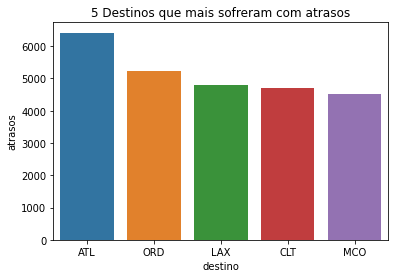

In [30]:
fig = plt.figure()

sns.barplot(data = df_destfinal, x= 'destino', y = 'atrasos')
plt.title('5 Destinos que mais sofreram com atrasos')

3. Quais são as velocidades médias dos voos nos 5 destinos que mais ocorrem atrasos.

 * Filtrando no dataframe os 5 piores destinos

In [31]:
df_vel = df_partida[(df_partida['dest'] == 'ORD') | (df_partida['dest'] == 'ATL') | (df_partida['dest'] == 'LAX') | (df_partida['dest'] == 'MCO') | (df_partida['dest'] == 'SFO')]

In [32]:
df_vel.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01 05:00:00
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,2013-01-01 06:00:00
12,2013,1,1,558.0,600,-2.0,924.0,917,7.0,UA,194,N29129,JFK,LAX,345.0,2475,6,0,2013-01-01 06:00:00
18,2013,1,1,600.0,600,0.0,837.0,825,12.0,MQ,4650,N542MQ,LGA,ATL,134.0,762,6,0,2013-01-01 06:00:00
25,2013,1,1,608.0,600,8.0,807.0,735,32.0,MQ,3768,N9EAMQ,EWR,ORD,139.0,719,6,0,2013-01-01 06:00:00


Calculando a velocidade média

In [33]:
df_vel['vel_med'] = df_vel['distance']/df_vel['air_time']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
df_vel.groupby('dest')['vel_med'].count()

dest
ATL    6417
LAX    4804
MCO    4520
ORD    5219
SFO    4110
Name: vel_med, dtype: int64

In [35]:
df_vel.groupby('dest')['vel_med'].describe().reset_index()

,dest,count,mean,std,min,25%,50%,75%,max
0,ATL,6417.0,6.576208,0.609108,4.238636,6.145161,6.568966,6.990826,8.860465
1,LAX,4804.0,7.362891,0.434505,5.625000,7.051282,7.347305,7.644860,8.935018
2,MCO,4520.0,6.827551,0.604439,4.418605,6.378378,6.839416,7.263566,8.596330
3,ORD,5219.0,6.171042,0.583094,3.631313,5.798387,6.198276,6.596330,7.815217
4,SFO,4110.0,7.310880,0.387651,5.277551,7.046322,7.286932,7.561404,8.550000


* Plotando o box Plot

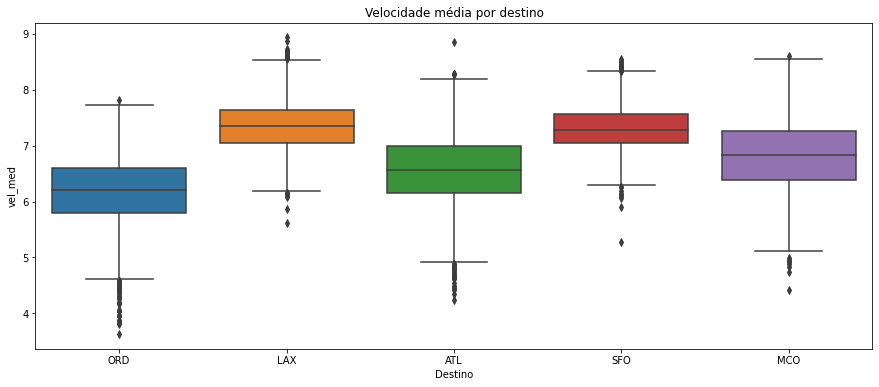

In [36]:
fig = plt.figure(figsize=(15,6))

sns.boxplot(x = df_vel['dest'], y = df_vel['vel_med'])

plt.xlabel('Destino')

plt.title('Velocidade média por destino')

plt.show()